<font size=7>**Avacado Project**

<font size=4>**Problem Statement:**

Avocado is a fruit consumed by people heavily in the United States.

<font size=4>**Content -**

This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:<br>

Date - The date of the observation<br>
Average Price - The average price of a single avocado<br>
Type - Whether it is conventional or organic<br>
Year - The year information<br>
Region - The city or region of the observation<br>
Total Volume - Total number of avocados sold<br>
4046 - Total number of avocados with PLU 4046 sold<br>
4225 - Total number of avocados with PLU 4225 sold<br>
4770 - Total number of avocados with PLU 4770 sold<br>

In [1]:
import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")
import joblib

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import zscore

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv(r"C:\Users\Mehul\Desktop\Data Trained\avacado.csv")
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,04-02-2018,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,28-01-2018,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,21-01-2018,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,14-01-2018,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


<font size=5>**Exploratory Data Analysis (EDA)**

In [3]:
df.drop("Unnamed: 0", axis=1, inplace=True)

In [5]:
df.shape

(18249, 13)

In [6]:
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


In [8]:
df.isna().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [9]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [10]:
df.nunique()

Date              169
AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
dtype: int64

In [11]:
df.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
year             0.215339
dtype: float64

In [12]:
df['Day'], df['Month'], df['Year'] = df['Date'].str.split('-').str
df.drop(columns=['Date','year'], inplace=True)
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Day,Month,Year
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,Albany,27,12,2015
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,Albany,20,12,2015
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,Albany,13,12,2015
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,Albany,06,12,2015
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,Albany,29,11,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,WestTexNewMexico,04,02,2018
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,WestTexNewMexico,28,01,2018
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,WestTexNewMexico,21,01,2018
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,WestTexNewMexico,14,01,2018


In [13]:
df['Year']=df['Year'].astype(int)
df['Month']=df['Month'].astype(int)
df['Date']=df['Day'].astype(int)
df.drop(columns=['Day'], inplace=True)
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Month,Year,Date
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,Albany,12,2015,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,Albany,12,2015,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,Albany,12,2015,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,Albany,12,2015,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,Albany,11,2015,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,WestTexNewMexico,2,2018,4
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,WestTexNewMexico,1,2018,28
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,WestTexNewMexico,1,2018,21
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,WestTexNewMexico,1,2018,14


<font size=5>**Visualization**

<font size=4>**Univariate Analysis**

conventional    9126
organic         9123
Name: type, dtype: int64


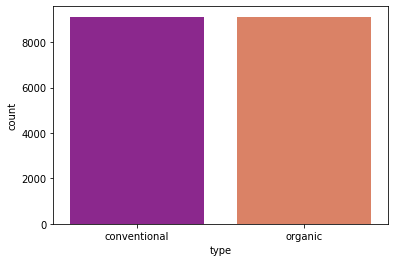

In [15]:
print(df['type'].value_counts())
sns.countplot(x='type', data=df, palette="plasma")
plt.show()

2017    5722
2016    5616
2015    5615
2018    1296
Name: Year, dtype: int64


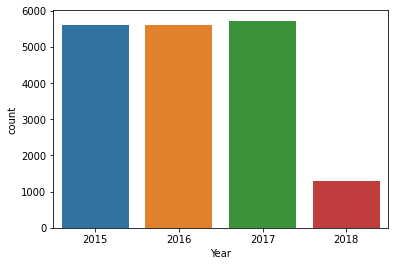

In [16]:
print(df['Year'].value_counts())
sns.countplot(x='Year', data=df)
plt.show()

1     1944
3     1836
2     1728
5     1512
7     1512
10    1512
4     1404
8     1404
11    1404
12    1403
9     1296
6     1294
Name: Month, dtype: int64


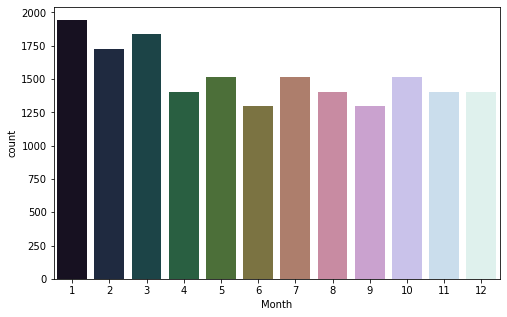

In [17]:
print(df['Month'].value_counts())
plt.figure(figsize=(8,5))
sns.countplot(x='Month', data=df, palette="cubehelix")
plt.show()

11    756
4     756
18    755
25    755
8     648
12    648
24    648
1     648
26    648
22    648
5     648
19    648
3     648
15    648
17    648
10    648
27    540
28    540
7     540
14    540
29    540
21    540
20    540
13    540
6     539
30    432
16    432
9     432
23    432
2     432
31    432
Name: Date, dtype: int64


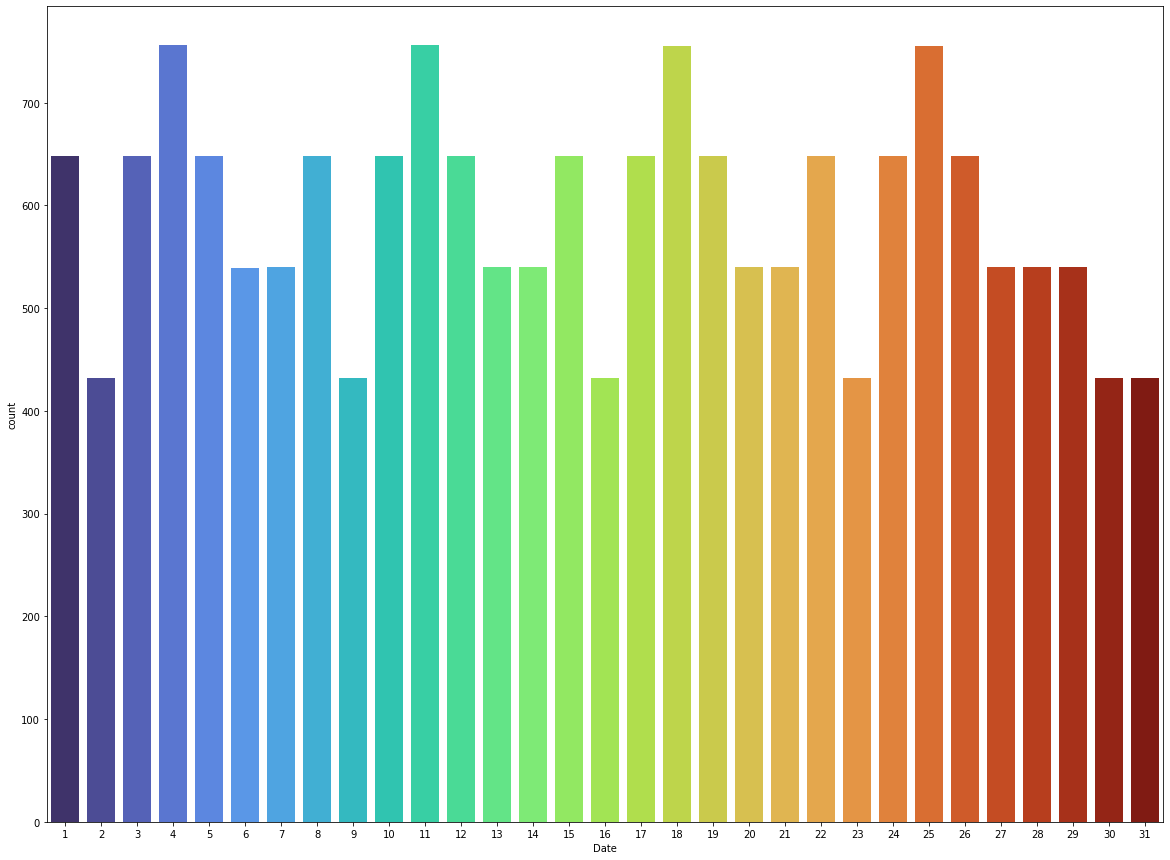

In [18]:
print(df['Date'].value_counts())
plt.figure(figsize=(20,15))
sns.countplot(x='Date', data=df, palette="turbo")
plt.show()

LasVegas               338
Louisville             338
Boise                  338
Orlando                338
California             338
SanFrancisco           338
BuffaloRochester       338
NorthernNewEngland     338
HarrisburgScranton     338
Plains                 338
Pittsburgh             338
Detroit                338
RaleighGreensboro      338
Indianapolis           338
West                   338
PhoenixTucson          338
Chicago                338
SouthCentral           338
Spokane                338
CincinnatiDayton       338
MiamiFtLauderdale      338
RichmondNorfolk        338
SouthCarolina          338
Denver                 338
Philadelphia           338
Atlanta                338
Northeast              338
Charlotte              338
NewOrleansMobile       338
Syracuse               338
Tampa                  338
BaltimoreWashington    338
Columbus               338
Nashville              338
SanDiego               338
Portland               338
Jacksonville           338
M

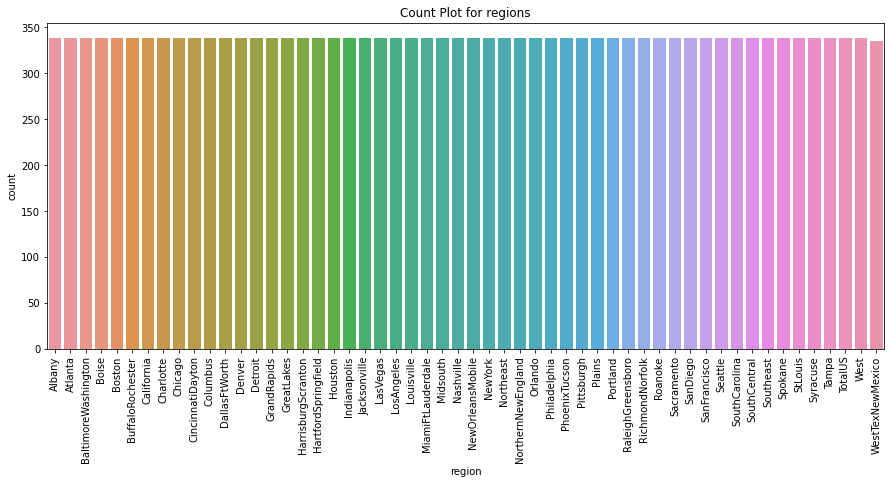

In [20]:
print(df['region'].value_counts())
plt.figure(figsize=(15,6))
sns.countplot(df['region'], data=df)
plt.title(f'Count Plot for regions')
plt.xticks(rotation=90)
plt.show()

<font size=4>**Bivariate analysis**

<Figure size 1080x720 with 0 Axes>

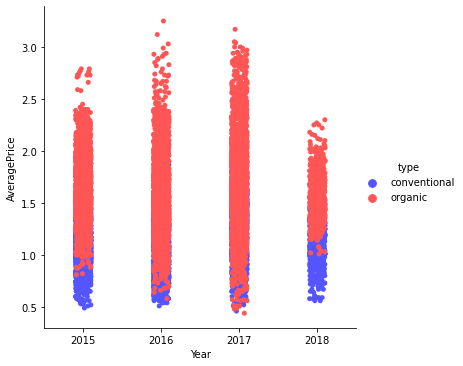

In [21]:
plt.figure(figsize=(15,10))
sns.catplot(x="Year", y="AveragePrice", hue="type", data=df, palette="seismic")
plt.show()

<Figure size 1080x720 with 0 Axes>

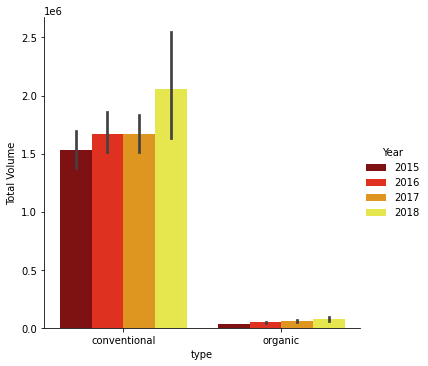

In [22]:
plt.figure(figsize=(15,10))
sns.catplot(x="type", y="Total Volume", hue="Year", kind="bar", data=df, palette="hot")
plt.show()

<Figure size 1080x720 with 0 Axes>

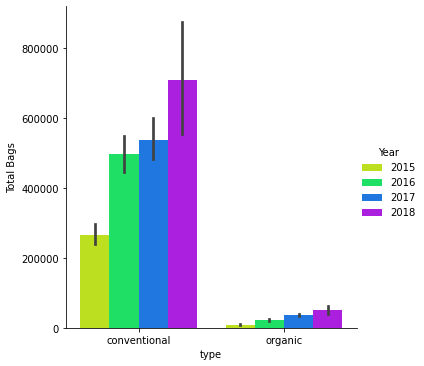

In [23]:
plt.figure(figsize=(15,10))
sns.catplot(x="type", y="Total Bags", hue="Year", data=df, kind="bar", palette="hsv")
plt.show()

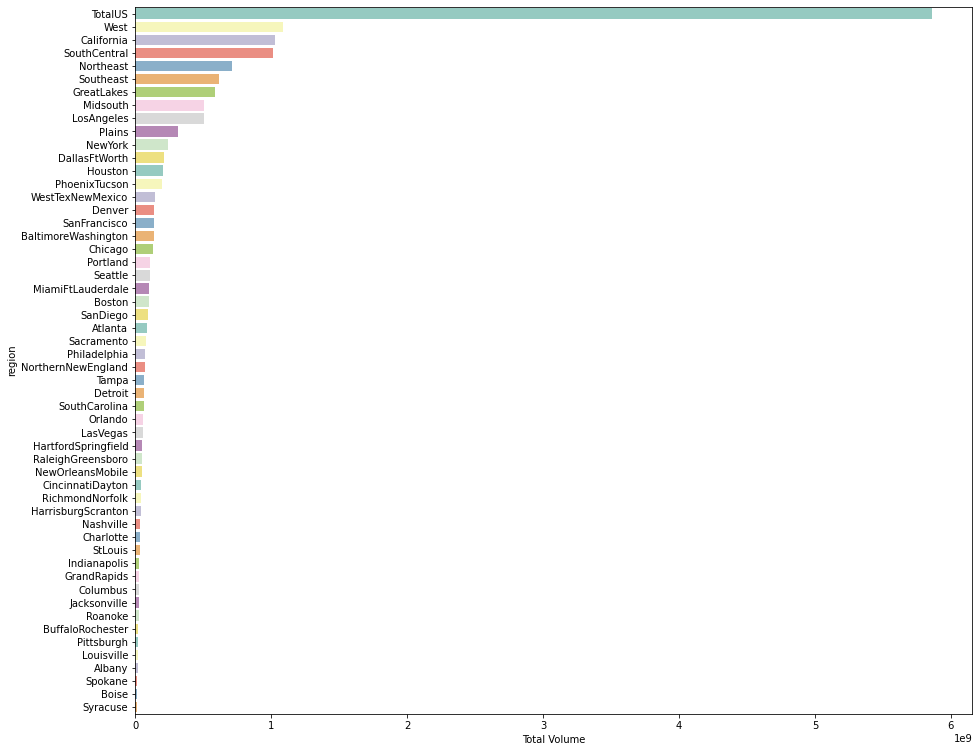

In [24]:
region = df.groupby('region')['Total Volume'].sum().sort_values(ascending=False).reset_index()
plt.figure(figsize=(15,13))
sns.barplot(x=region["Total Volume"], y=region["region"], data=df, palette="Set3")
plt.show()

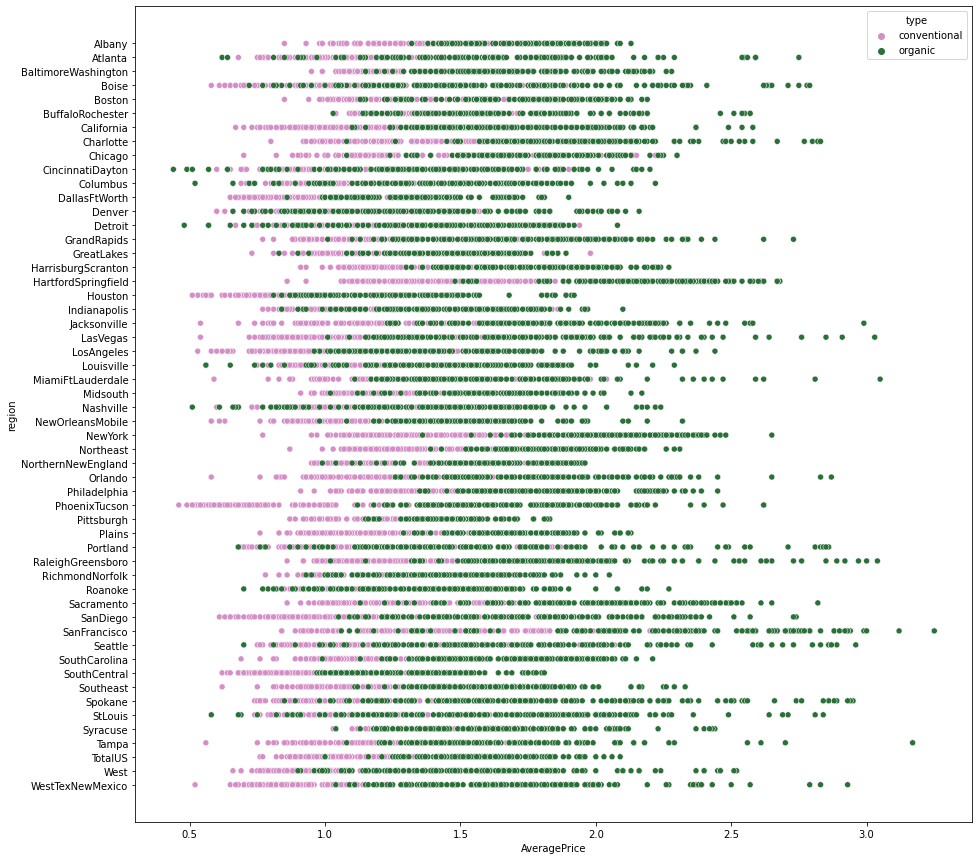

In [25]:
plt.figure(figsize=(15,15))
sns.scatterplot(x='AveragePrice', y='region', hue='type', data=df, palette="cubehelix_r")
plt.show()

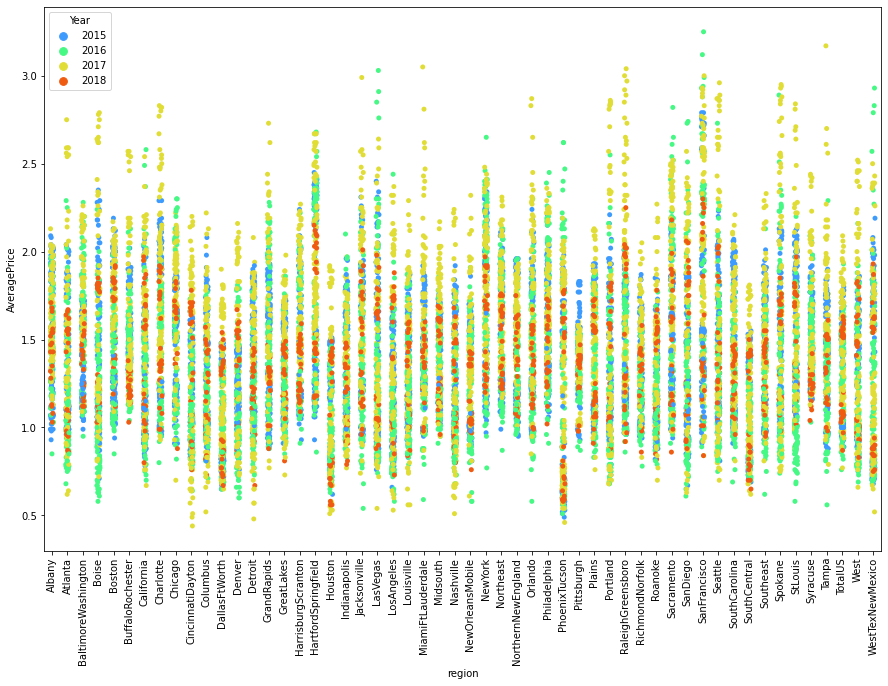

In [26]:
plt.figure(figsize=(15,10))
sns.stripplot(x='region', y='AveragePrice', hue="Year", data=df, palette="turbo")
plt.xticks(rotation=90)
plt.show()

<font size=4>**Multivariate Analysis**

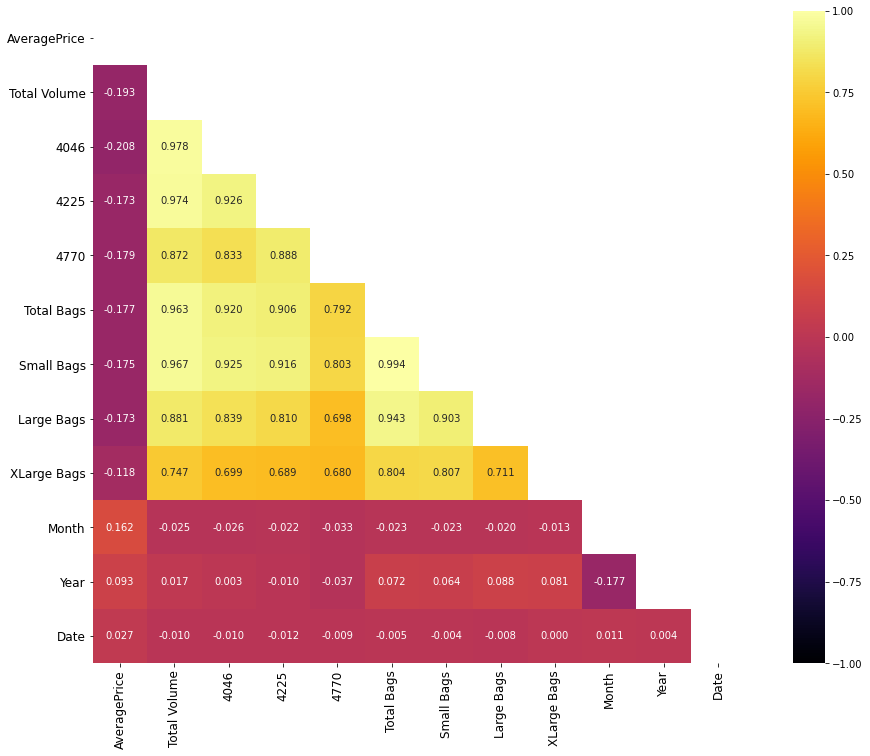

In [27]:
upper_triangle = np.triu(df.corr())
plt.figure(figsize=(17,12))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="inferno", mask=upper_triangle)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [28]:
df.drop(["4046", "4225", "4770", "Small Bags", "Large Bags", "XLarge Bags"], axis=1, inplace=True)

<font size=5>**Encoding**

In [29]:
oe = OrdinalEncoder()
df['region']=oe.fit_transform(df['region'].values.reshape(-1,1))
df['type']=oe.fit_transform(df['type'].values.reshape(-1,1))
df

,AveragePrice,Total Volume,Total Bags,type,region,Month,Year,Date
0,1.33,64236.62,8696.87,0.0,0.0,12,2015,27
1,1.35,54876.98,9505.56,0.0,0.0,12,2015,20
2,0.93,118220.22,8145.35,0.0,0.0,12,2015,13
3,1.08,78992.15,5811.16,0.0,0.0,12,2015,6
4,1.28,51039.60,6183.95,0.0,0.0,11,2015,29
...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,13498.67,1.0,53.0,2,2018,4
18245,1.71,13888.04,9264.84,1.0,53.0,1,2018,28
18246,1.87,13766.76,9394.11,1.0,53.0,1,2018,21
18247,1.93,16205.22,10969.54,1.0,53.0,1,2018,14


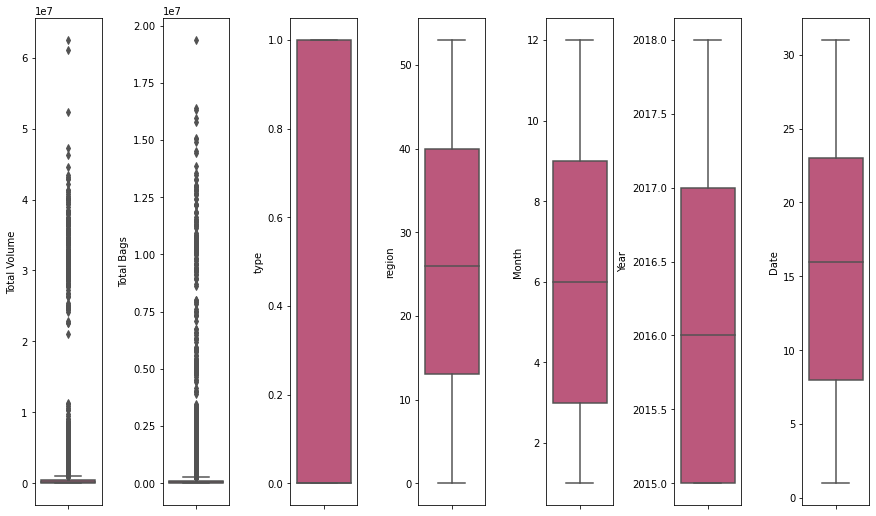

In [30]:
fig, ax = plt.subplots(ncols=7, nrows=1, figsize=(12,7))
index = 0
features = df.drop("AveragePrice", axis=1)
ax = ax.flatten()
for col, value in features.items():
    sns.boxplot(y=col, data=df, ax=ax[index], palette="plasma")
    index += 1
plt.tight_layout(pad=0.1, w_pad=0.5, h_pad=1.0)
plt.show()

In [31]:
z = np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)
df=df1.copy()

Shape of the dataframe before removing outliers:  (18249, 8)
Shape of the dataframe after removing outliers:  (17931, 8)
Percentage of data loss post outlier removal:  1.7425612362321221


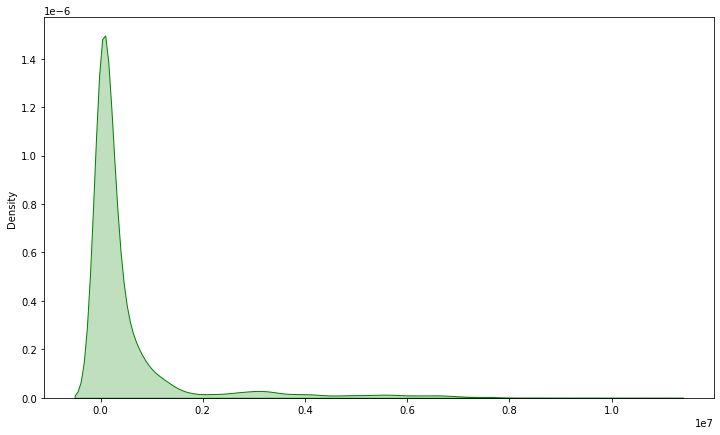

In [33]:
plt.figure(figsize=(12,7))
sns.distplot(x=df["Total Volume"], hist=False, color="g", kde_kws={"shade": True})
plt.show()

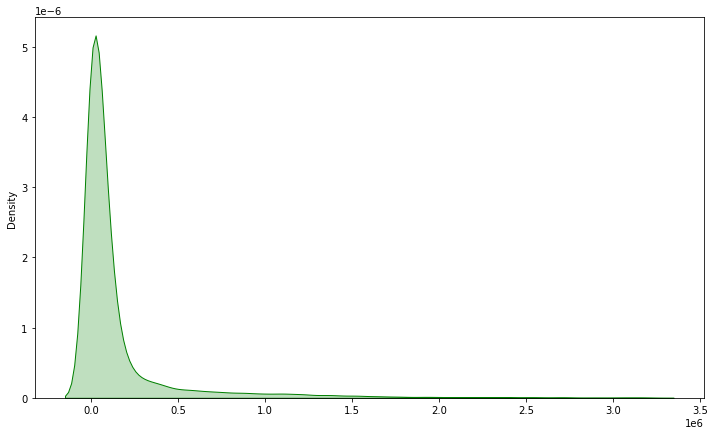

In [34]:
plt.figure(figsize=(12,7))
sns.distplot(x=df["Total Bags"], hist=False, color="g", kde_kws={"shade": True})
plt.show()

<font size=5>**Using Log Transform to fix skewness**

In [35]:
for col in df.columns:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

In [36]:
df.skew()

AveragePrice    0.388855
Total Volume   -0.024234
Total Bags     -0.334742
type           -0.005912
region          0.014808
Month           0.114771
Year            0.225227
Date            0.014381
dtype: float64

<font size=5>**Splitting the dataset into 2 variables namely 'X' and 'Y' for feature and label**

In [37]:
X = df.drop('AveragePrice', axis=1)
Y = df['AveragePrice']

<font size=5>**Feature Scaling**

In [38]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head(10)

,Total Volume,Total Bags,type,region,Month,Year,Date
0,-0.090582,-0.493196,-1.00296,-1.694204,1.650340,-1.215795,1.291781
1,-0.161393,-0.452528,-1.00296,-1.694204,1.650340,-1.215795,0.493909
2,0.183695,-0.523161,-1.00296,-1.694204,1.650340,-1.215795,-0.303964
3,0.002395,-0.677598,-1.00296,-1.694204,1.650340,-1.215795,-1.101837
4,-0.193989,-0.649161,-1.00296,-1.694204,1.367566,-1.215795,1.519745
5,-0.152446,-0.613603,-1.00296,-1.694204,1.367566,-1.215795,0.721872
6,0.027100,-0.513521,-1.00296,-1.694204,1.367566,-1.215795,-0.076001
7,0.148946,-0.603766,-1.00296,-1.694204,1.367566,-1.215795,-0.873873
8,0.107584,-0.369872,-1.00296,-1.694204,1.367566,-1.215795,-1.671746
9,-0.024906,-0.496942,-1.00296,-1.694204,1.084793,-1.215795,1.063818


<font size=5>**Finding best random state for building Regression Models**

In [39]:
maxAccu=0
maxRS=0

for i in range(1, 1000):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=i)
    lr=LinearRegression()
    lr.fit(X_train, Y_train)
    pred = lr.predict(X_test)
    r2 = r2_score(Y_test, pred)
    
    if r2>maxAccu:
        maxAccu=r2
        maxRS=i

print("Best r2 score is", maxAccu,"on Random State", maxRS)

Best r2 score is 0.5021238214614996 on Random State 144


In [40]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=144)

<font size=5>**Machine Learning Model for Regression with Evaluation Metrics**

In [41]:
def reg(model, X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=708)
    
    # Training the model
    model.fit(X_train, Y_train)
    
    # Predicting Y_test
    pred = model.predict(X_test)
    
    # RMSE - a lower RMSE score is better than a higher one
    rmse = mean_squared_error(Y_test, pred, squared=False)
    print("RMSE Score is:", rmse)
    
    # R2 score
    r2 = r2_score(Y_test, pred, multioutput='variance_weighted')*100
    print("R2 Score is:", r2)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of r2 score minus cv score
    result = r2 - cv_score
    print("R2 Score - Cross Validation Score is", result)

<font size=4>**Linear Regression Model**

In [42]:
model=LinearRegression()
reg(model, X, Y)

RMSE Score is: 0.2843241073646302
R2 Score is: 47.91662124818624
Cross Validation Score: 12.2993692066774
R2 Score - Cross Validation Score is 35.61725204150884


<font size=4>**Ridge Regression**

In [43]:
model=Ridge(alpha=1e-2, normalize=True)
reg(model, X, Y)

RMSE Score is: 0.28468212924064595
R2 Score is: 47.78537153236971
Cross Validation Score: 12.572883789963424
R2 Score - Cross Validation Score is 35.21248774240628


<font size=4>**Lasso Regression**

In [44]:
model=Lasso(alpha=1e-2, normalize=True, max_iter=1e5)
reg(model, X, Y)

RMSE Score is: 0.39412850641568486
R2 Score is: -0.08004140738024912
Cross Validation Score: -116.71934809126752
R2 Score - Cross Validation Score is 116.63930668388727


<font size=4>**Support Vector Regression**

In [45]:
model=SVR(C=1.0, epsilon=0.2, kernel='poly', gamma='auto')
reg(model, X, Y)

RMSE Score is: 0.262822342142455
R2 Score is: 55.49627701085949
Cross Validation Score: -17.860820347670415
R2 Score - Cross Validation Score is 73.3570973585299


<font size=4>**Decision Tree Regressor**

In [47]:
model=DecisionTreeRegressor(criterion="poisson", random_state=111)
reg(model, X, Y)

RMSE Score is: 0.34727199177352996
R2 Score is: 22.301739279650835
Cross Validation Score: -141.34710852272775
R2 Score - Cross Validation Score is 163.64884780237858


<font size=4>**Random Forest Regressor**

In [49]:
model=RandomForestRegressor(max_depth=2, max_features="sqrt")
reg(model, X, Y)

RMSE Score is: 0.29892461714607266
R2 Score is: 42.43014379733874
Cross Validation Score: -12.094602078274097
R2 Score - Cross Validation Score is 54.52474587561284


<font size=4>**K Neighbors Regressor**

In [50]:
KNeighborsRegressor(n_neighbors=2, algorithm='kd_tree')
reg(model, X, Y)

RMSE Score is: 0.2993720666899683
R2 Score is: 42.257666298085084
Cross Validation Score: -15.288431197961136
R2 Score - Cross Validation Score is 57.54609749604622


<font size=4>**Gradient Boosting Regressor**

In [51]:
model=GradientBoostingRegressor(loss='quantile', n_estimators=200, max_depth=5)
reg(model, X, Y)

RMSE Score is: 0.28087886441357746
R2 Score is: 49.171194635455514
Cross Validation Score: -16.96114165581509
R2 Score - Cross Validation Score is 66.1323362912706


 <font size=4>**Ada Boost Regressor**

In [53]:
model=AdaBoostRegressor(n_estimators=300, learning_rate=1.05, random_state=42)
reg(model, X, Y)

RMSE Score is: 0.27318551133536384
R2 Score is: 51.917492715255435
Cross Validation Score: -2.206281890559678
R2 Score - Cross Validation Score is 54.123774605815115


<font size=4>**Extra Trees Regressor**

In [54]:
model=ExtraTreesRegressor(n_estimators=200, max_features='sqrt', n_jobs=6)
reg(model, X, Y)

RMSE Score is: 0.17629422689572424
R2 Score is: 79.97613250612329
Cross Validation Score: 18.064856927657214
R2 Score - Cross Validation Score is 61.911275578466075


<font size=4>**XGB Regressor**

In [55]:
model=XGBRegressor()
reg(model, X, Y)

RMSE Score is: 0.13155933805213282
R2 Score is: 88.8489659848561
Cross Validation Score: 39.4756689897447
R2 Score - Cross Validation Score is 49.373296995111396


<font size=5>**Hyper parameter tuning on the best ML Model**

<font size=4>**Choosing XGB Regressor**

In [56]:
fmod_param = {'n_estimators' : [200, 400, 600],
              'gamma' : [2.0, 3.0, 4.0],
              'max_depth' : [4, 6, 8],
              'n_jobs' : [-2, -1, 1]
             }

In [57]:
GSCV = GridSearchCV(XGBRegressor(), fmod_param, cv=5)

In [58]:
GSCV.fit(X_train,Y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, predictor=None,
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
       

In [59]:
GSCV.best_params_

{'gamma': 2.0, 'max_depth': 8, 'n_estimators': 200, 'n_jobs': -2}

In [60]:
GSCV.best_score_

0.7423465479786919

In [61]:
Final_Model = XGBRegressor(gamma=2.0, max_depth=8, n_estimators=200, n_jobs=-2)
Classifier = Final_Model.fit(X_train, Y_train)
fmod_pred = Final_Model.predict(X_test)
fmod_r2 = r2_score(Y_test, fmod_pred)*100
print("R2 score for the Best Model is:", fmod_r2)

R2 score for the Best Model is: 78.88427707762189


<font size=5>**Saving the best model**

In [62]:
filename = "FinalModel_E02.pkl"
joblib.dump(Final_Model, filename)

['FinalModel_E02.pkl']